<a href="https://www.kaggle.com/code/enesarslan8/flo-customer-segmantation-with-rfm?scriptVersionId=100165943" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Business Problem

FLO which a shoe store, wants to divide their customers into segments and create marketing strategies by the help of these segments.
***
* **master_id** : Unique Customer ID
* **order_channel** : Channel that used while ordering (Android, ios, Desktop, Mobile)
* **last_order_channel** : Channel that used on customer's last order 
* **first_order_date** : First order date
* **last_order_date** : Last order date
* **last_order_date_online** : Last online order date
* **last_order_date_offline** : Last offline order date
* **order_num_total_ever_online** : Total online order
* **order_num_total_ever_offline** : Total offline order
* **customer_value_total_ever_offline** : Total money spent on offline order
* **customer_value_total_ever_online** : Total money spent on online order
* **interested_in_categories_12** : Interested categories of the customers
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_columns',None)

In [2]:
df_ = pd.read_csv('../input/flo-rfm/flo_data_20k.csv')

In [3]:
df = df_.copy()

# First Look at the Data

In [4]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [5]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [7]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

***
# Data Preparation

In [9]:
# Creating total_order and total_value columns to keep sum of the online and offline sales

df['total_order'] = (df.order_num_total_ever_online + df.order_num_total_ever_offline)

df['total_value'] = (df.customer_value_total_ever_online + df.customer_value_total_ever_offline)

In [10]:
# Changing the data type of the date columns to datetime

for col in df.columns:
    if 'date' in col:
        df[col] = pd.to_datetime(df[col])

In [11]:
df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
total_order                                 float64
total_value                                 float64
dtype: object

# Data Exploration

In [12]:
channel_group = df.groupby('order_channel').agg({'master_id':'count',
                                'total_order':'sum',
                                'total_value':'sum'})
channel_group

,master_id,total_order,total_value
order_channel,,,
Android App,9495,52269.0,7819062.76
Desktop,2735,10920.0,1610321.46
Ios App,2833,15351.0,2525999.93
Mobile,4882,21679.0,3028183.16


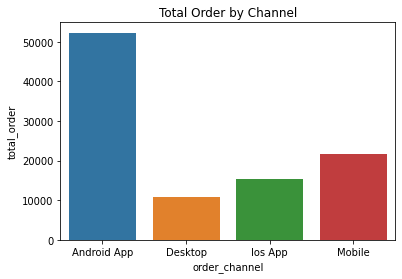

In [13]:
# Total orders by sale channels

sns.barplot(x=channel_group.index,y=channel_group.total_order)
plt.title('Total Order by Channel')
plt.show()

In [14]:
# Top 10 Customers by total_value
df.sort_values(by='total_value',ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0,2.0,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.0,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.0,1.0,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.0,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0,1.0,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.0,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.0,1.0,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.0,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.0,3.0,18119.14,2587.20,[AKTIFSPOR],4.0,20706.34
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0,4.0,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.0,18443.57
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0,1.0,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.0,16918.57
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.0,1.0,180.73,12545.37,"[ERKEK, AKTIFSPOR]",37.0,12726.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0,1.0,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.0,12282.24
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.0,2.0,64.97,12038.18,"[ERKEK, KADIN]",20.0,12103.15


In [15]:
# Top 10 customers by total order
df.sort_values(by='total_order',ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0,2.0,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.0,45905.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0,1.0,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.0,12282.24
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.0,109.0,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.0,10383.44
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.0,87.0,8432.25,139.98,[ERKEK],88.0,8572.23
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.0,81.0,3997.55,242.81,[ERKEK],83.0,4240.36
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0,1.0,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.0,33918.10
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.0,74.0,4640.77,543.28,"[KADIN, AKTIFSPOR]",77.0,5184.05
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.0,3.0,292.93,5004.95,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.0,5297.88
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0,1.0,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.0,16918.57
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0,4.0,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.0,18443.57


# Calculating RFM Metrics

In [16]:
#setting an analysis date for more readable recency column

analysis_date = df.last_order_date.max() + dt.timedelta(days=2)
analysis_date

Timestamp('2021-06-01 00:00:00')

In [17]:
# Calculating RFM metrics

rfm = df.agg({'last_order_date' : lambda date : (analysis_date - date).days,
            'total_order': lambda x: x,
            'total_value': lambda x: x})

rfm.columns = ['recency','frequency','monetary']

rfm

,recency,frequency,monetary
0,95,5.0,939.37
1,105,21.0,2013.55
2,186,5.0,585.32
3,135,2.0,121.97
4,86,2.0,209.98
...,...,...,...
19940,331,3.0,401.96
19941,161,2.0,390.47
19942,8,3.0,632.94
19943,108,6.0,1009.77


In [18]:
# Calculating RFM scores

rfm['recency_score'] = pd.qcut(rfm.recency, 5, list('54321'))

rfm['frequency_score'] = pd.qcut(rfm.frequency.rank(method='first'),5,list('12345'))

rfm['monetary_score'] = pd.qcut(rfm.monetary,5,list('12345'))

In [19]:
rfm['RF_Score'] = (rfm.recency_score.astype(str) + rfm.frequency_score.astype(str))

In [20]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_Score
0,95,5.0,939.37,3,4,4,34
1,105,21.0,2013.55,3,5,5,35
2,186,5.0,585.32,2,4,3,24
3,135,2.0,121.97,3,1,1,31
4,86,2.0,209.98,3,1,1,31


***

# Labeling

![](https://miro.medium.com/max/1234/1*oUKMc3gk53hccFX4YNeu1g.png)

In [21]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [22]:
rfm['segment'] = rfm['RF_Score'].replace(seg_map, regex=True)

In [23]:
rfm.groupby('segment').mean()

,recency,frequency,monetary
segment,,,
about_to_sleep,113.785144,2.401473,359.008963
at_Risk,241.606835,4.472373,646.610236
cant_loose,235.444167,10.698333,1474.468217
champions,17.106625,8.934265,1406.625109
hibernating,247.949501,2.394007,366.267062
loyal_customers,82.594763,8.374591,1216.818616
need_attention,113.828676,3.727825,562.142965
new_customers,17.917647,2.000000,339.955544
potential_loyalists,37.155888,3.304289,533.184466


# Business Cases

a. FLO adding a new woman shoe brand to their catalog. New brand's price is over the general customer preferences. Thus FLO needs to create a marketing strategy to target their customers on the 'champion' or loyal_customer' segment for this brand's marketing operations.

In [24]:
champ_loyal_index = rfm[(rfm.segment == 'champions') | (rfm.segment == 'loyal_customers')].index

In [25]:
champ_loyal_customers = df.iloc[champ_loyal_index]

In [26]:
champ_loyal_woman_id = champ_loyal_customers\
                       [champ_loyal_customers.interested_in_categories_12.str.contains('KADIN')].master_id

champ_loyal_woman_id 

0        cc294636-19f0-11eb-8d74-000d3a38a36f
1        f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
8        cfbda69e-5b4f-11ea-aca7-000d3a38a36f
11       c2e15af2-9eed-11e9-9897-000d3a38a36f
33       fb840306-1219-11ea-a001-000d3a38a36f
                         ...                 
19912    f63aba0e-41d8-11ea-96d9-000d3a38a36f
19913    81d0da04-a53e-11e9-a2fc-000d3a38a36f
19914    825e6b00-ab40-11e9-a2fc-000d3a38a36f
19917    f8c471c8-2596-11eb-81e9-000d3a38a36f
19926    7e1c15be-6298-11ea-9861-000d3a38a36f
Name: master_id, Length: 2497, dtype: object

In [27]:
# champ_loyal_woman_id.to_csv('champ_loyal_woman_csv')

b. FLO wants to make discount on their Man and Kid shoes. FLO also wants to target their 'cant_loose','hibernating','new_customers' segments to change the situtation of this customers.

In [28]:
risk_map = rfm.segment.apply(lambda x : True if str(x) in ['hibernating','new_customers','cant_loose'] else False)

In [29]:
risk_index = rfm[risk_map].index

In [30]:
risk_customers = df.iloc[risk_index]

In [31]:
risk_customers.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK],2.0,163.63
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]",2.0,165.96
10,ae608ece-c9d8-11ea-a31e-000d3a38a36f,Ios App,Offline,2020-07-19,2020-07-25,2020-07-19,2020-07-25,1.0,1.0,74.99,39.99,"[AKTIFCOCUK, COCUK, KADIN]",2.0,114.98
15,13ed97a4-b167-11e9-89fa-000d3a38a36f,Mobile,Desktop,2019-06-13,2020-08-17,2020-08-17,2020-07-28,7.0,1.0,112.97,819.39,"[AKTIFCOCUK, COCUK, KADIN]",8.0,932.36
19,2730793e-3908-11ea-85d6-000d3a38a36f,Mobile,Mobile,2019-07-29,2020-06-19,2020-06-19,2019-07-29,1.0,1.0,34.99,279.99,[ERKEK],2.0,314.98


In [32]:
risk_man_kid_id = risk_customers[risk_customers.interested_in_categories_12.str.contains('ERKEK') |\
                                    risk_customers.interested_in_categories_12.str.contains('COCUK')].master_id

risk_man_kid_id

7        3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f
10       ae608ece-c9d8-11ea-a31e-000d3a38a36f
15       13ed97a4-b167-11e9-89fa-000d3a38a36f
19       2730793e-3908-11ea-85d6-000d3a38a36f
21       7b289956-d691-11e9-93bc-000d3a38a36f
                         ...                 
19910    7ab86f3e-b244-11ea-b736-000d3a38a36f
19928    8ef8cfc4-606f-11ea-8dd8-000d3a38a36f
19932    13a5e98c-a824-11e9-a2fc-000d3a38a36f
19933    6d285c64-5e73-11ea-be5b-000d3a38a36f
19936    1982ac0e-9f4c-11e9-9897-000d3a38a36f
Name: master_id, Length: 2771, dtype: object

In [33]:
# risk_man_kid_id.to_csv('risk_man_kid_index')